# xarray Introduction

xarray is a Python library for handling multi-dimensional arrays with coordinates. It is based on the NetCDF data format, but can also read and write other formats.

This notebook just serves as a first introduction, for more check out the examples in the documentation: http://xarray.pydata.org/en/stable/examples.html

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Opening a files as a dataset

xarray has two basic objects: Datasets and DataArrays. Datasets contain multiple variables (e.g. temperature, humidity, etc.) while DataArrays just contain one variables. Datasets therefore are a combination of multiple DataArrays.

In [2]:
ds = xr.open_dataset('CAM01.nc', decode_times=False)

Because this file does not have correctly encoded times, we use the `decode_times=False` option. Whenever you see an error or a warning about `unable to decode time axis`, just use this option!

In [3]:
ds

<xarray.Dataset>
Dimensions:  (lat: 64, lev: 30, lon: 128, time: 24)
Coordinates:
  * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 -76.74 -73.95 -71.16 ...
  * lon      (lon) float64 0.0 2.812 5.625 8.438 11.25 14.06 16.88 19.69 ...
  * lev      (lev) float64 3.643 7.595 14.36 24.61 38.27 54.6 72.01 87.82 ...
  * time     (time) float64 0.0 0.04167 0.08333 0.125 0.1667 0.2083 0.25 ...
Data variables:
    TAP      (time, lev, lat, lon) float32 ...
    SOLIN    (time, lat, lon) float32 ...

Datasets have dimensions, each of which comes with a coordinate array, specifying for example the longitude. Datasets also have one or more data variables. In our case we have TAP (Temperature), which has 4 dimensions, and SOLIN (incoming solar radiation) which has 3 dimensions.

We can grab one of these variables like so:

In [4]:
TAP = ds['TAP']; TAP

<xarray.DataArray 'TAP' (time: 24, lev: 30, lat: 64, lon: 128)>
[5898240 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 -76.74 -73.95 -71.16 ...
  * lon      (lon) float64 0.0 2.812 5.625 8.438 11.25 14.06 16.88 19.69 ...
  * lev      (lev) float64 3.643 7.595 14.36 24.61 38.27 54.6 72.01 87.82 ...
  * time     (time) float64 0.0 0.04167 0.08333 0.125 0.1667 0.2083 0.25 ...
Attributes:
    units:      K
    long_name:  T after physics

This is now a DataArray. As you can see it also has coordinates and dimensions, and additionally attributes such as units.

## Indexing

Next, we will look at how indexing, i.e. selecting parts of the data, works. There are two basic methods. Selecting by integers/index, similarly to what you wold do in numpy and selecting by label.

Let's start by selecting a latitude by index.

In [5]:
ds.isel(lat=20)

<xarray.Dataset>
Dimensions:  (lev: 30, lon: 128, time: 24)
Coordinates:
    lat      float64 -32.09
  * lon      (lon) float64 0.0 2.812 5.625 8.438 11.25 14.06 16.88 19.69 ...
  * lev      (lev) float64 3.643 7.595 14.36 24.61 38.27 54.6 72.01 87.82 ...
  * time     (time) float64 0.0 0.04167 0.08333 0.125 0.1667 0.2083 0.25 ...
Data variables:
    TAP      (time, lev, lon) float32 ...
    SOLIN    (time, lon) float32 ...

We can also select several dimensions at once.

In [6]:
ds.isel(lat=20, lon=10, lev=2, time=5)

<xarray.Dataset>
Dimensions:  ()
Coordinates:
    lat      float64 -32.09
    lon      float64 28.12
    lev      float64 14.36
    time     float64 0.2083
Data variables:
    TAP      float32 ...
    SOLIN    float32 ...

If we want to select a range of values, we can use the Python slice object, which indicates from where to where we would like to grab the values for each dimension.

In [7]:
ds.isel(lat=slice(2, 4), lon=slice(10, 15), lev=20)

<xarray.Dataset>
Dimensions:  (lat: 2, lon: 5, time: 24)
Coordinates:
  * lat      (lat) float64 -82.31 -79.53
  * lon      (lon) float64 28.12 30.94 33.75 36.56 39.38
    lev      float64 691.4
  * time     (time) float64 0.0 0.04167 0.08333 0.125 0.1667 0.2083 0.25 ...
Data variables:
    TAP      (time, lat, lon) float32 ...
    SOLIN    (time, lat, lon) float32 ...

For DataArrays we can use the exact same syntax, but we can also use the traditional numpy indexing.

In [8]:
TAP

<xarray.DataArray 'TAP' (time: 24, lev: 30, lat: 64, lon: 128)>
[5898240 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 -76.74 -73.95 -71.16 ...
  * lon      (lon) float64 0.0 2.812 5.625 8.438 11.25 14.06 16.88 19.69 ...
  * lev      (lev) float64 3.643 7.595 14.36 24.61 38.27 54.6 72.01 87.82 ...
  * time     (time) float64 0.0 0.04167 0.08333 0.125 0.1667 0.2083 0.25 ...
Attributes:
    units:      K
    long_name:  T after physics

In [9]:
TAP.isel(time=slice(5,10), lat=10)

<xarray.DataArray 'TAP' (time: 5, lev: 30, lon: 128)>
array([[[ 244.217575,  244.21225 , ...,  244.44072 ,  244.286987],
        [ 233.10199 ,  232.931168, ...,  233.212982,  233.215988],
        ..., 
        [ 272.335968,  272.294495, ...,  272.567627,  272.447235],
        [ 273.428131,  273.599365, ...,  274.010529,  273.811646]],

       [[ 244.155823,  244.191101, ...,  244.321701,  244.188507],
        [ 233.004333,  232.846603, ...,  233.123032,  233.113953],
        ..., 
        [ 272.241425,  272.239594, ...,  272.519867,  272.321991],
        [ 273.512177,  273.387909, ...,  273.911652,  273.635071]],

       ..., 
       [[ 244.192627,  244.25264 , ...,  244.251068,  244.172531],
        [ 232.976517,  232.856491, ...,  233.136703,  233.104523],
        ..., 
        [ 272.212189,  272.1633  , ...,  272.543304,  272.260986],
        [ 273.472137,  273.450958, ...,  273.884674,  273.574402]],

       [[ 244.323776,  244.376465, ...,  244.337234,  244.286957],
        [ 233.

In [10]:
TAP[5:10, :, 10]

<xarray.DataArray 'TAP' (time: 5, lev: 30, lon: 128)>
array([[[ 244.217575,  244.21225 , ...,  244.44072 ,  244.286987],
        [ 233.10199 ,  232.931168, ...,  233.212982,  233.215988],
        ..., 
        [ 272.335968,  272.294495, ...,  272.567627,  272.447235],
        [ 273.428131,  273.599365, ...,  274.010529,  273.811646]],

       [[ 244.155823,  244.191101, ...,  244.321701,  244.188507],
        [ 233.004333,  232.846603, ...,  233.123032,  233.113953],
        ..., 
        [ 272.241425,  272.239594, ...,  272.519867,  272.321991],
        [ 273.512177,  273.387909, ...,  273.911652,  273.635071]],

       ..., 
       [[ 244.192627,  244.25264 , ...,  244.251068,  244.172531],
        [ 232.976517,  232.856491, ...,  233.136703,  233.104523],
        ..., 
        [ 272.212189,  272.1633  , ...,  272.543304,  272.260986],
        [ 273.472137,  273.450958, ...,  273.884674,  273.574402]],

       [[ 244.323776,  244.376465, ...,  244.337234,  244.286957],
        [ 233.

Now on to indexing by label. For this we use the `sel` command. Because our coordinates are floats, we have to use the `method='nearest'` option.

In [11]:
ds.sel(lat=20, method='nearest')

<xarray.Dataset>
Dimensions:  (lev: 30, lon: 128, time: 24)
Coordinates:
    lat      float64 20.93
  * lon      (lon) float64 0.0 2.812 5.625 8.438 11.25 14.06 16.88 19.69 ...
  * lev      (lev) float64 3.643 7.595 14.36 24.61 38.27 54.6 72.01 87.82 ...
  * time     (time) float64 0.0 0.04167 0.08333 0.125 0.1667 0.2083 0.25 ...
Data variables:
    TAP      (time, lev, lon) float32 ...
    SOLIN    (time, lon) float32 ...

As above we can pass a slice object to grab a range of values. Here now, we must not use the nearest method.

In [12]:
ds.sel(lat=slice(-10, 10), lon=slice(20, 40))

<xarray.Dataset>
Dimensions:  (lat: 8, lev: 30, lon: 7, time: 24)
Coordinates:
  * lat      (lat) float64 -9.767 -6.977 -4.186 -1.395 1.395 4.186 6.977 9.767
  * lon      (lon) float64 22.5 25.31 28.12 30.94 33.75 36.56 39.38
  * lev      (lev) float64 3.643 7.595 14.36 24.61 38.27 54.6 72.01 87.82 ...
  * time     (time) float64 0.0 0.04167 0.08333 0.125 0.1667 0.2083 0.25 ...
Data variables:
    TAP      (time, lev, lat, lon) float32 ...
    SOLIN    (time, lat, lon) float32 ...

We can also combine the different methods. If we wanted to select a certain longitude-latitude range by label (i.e. degrees) and additionally the 20th model level we can just do it in turn.

In [13]:
ds.sel(lat=slice(-10, 10), lon=slice(20, 40)).isel(lev=20)

<xarray.Dataset>
Dimensions:  (lat: 8, lon: 7, time: 24)
Coordinates:
  * lat      (lat) float64 -9.767 -6.977 -4.186 -1.395 1.395 4.186 6.977 9.767
  * lon      (lon) float64 22.5 25.31 28.12 30.94 33.75 36.56 39.38
    lev      float64 691.4
  * time     (time) float64 0.0 0.04167 0.08333 0.125 0.1667 0.2083 0.25 ...
Data variables:
    TAP      (time, lat, lon) float32 ...
    SOLIN    (time, lat, lon) float32 ...

Again, this indexing method also works for DataArrays

In [14]:
TAP.sel(lat=slice(-10, 10), lon=slice(20, 40)).isel(lev=20)

<xarray.DataArray 'TAP' (time: 24, lat: 8, lon: 7)>
array([[[ 283.465546,  283.025513, ...,  281.463745,  281.193878],
        [ 283.612   ,  283.174133, ...,  281.939758,  282.270233],
        ..., 
        [ 282.480804,  282.576263, ...,  283.051025,  283.005829],
        [ 282.079468,  281.920898, ...,  283.57135 ,  283.292358]],

       [[ 283.170349,  282.834045, ...,  281.374786,  281.141785],
        [ 283.470795,  283.065338, ...,  281.741791,  282.05191 ],
        ..., 
        [ 282.45932 ,  282.835358, ...,  282.872894,  282.315857],
        [ 281.86319 ,  281.851044, ...,  283.500763,  282.934448]],

       ..., 
       [[ 283.333923,  283.22934 , ...,  282.688019,  283.017426],
        [ 282.866608,  282.889618, ...,  283.27005 ,  283.988922],
        ..., 
        [ 282.696259,  283.405334, ...,  282.56427 ,  283.458954],
        [ 282.639404,  282.346252, ...,  281.285553,  282.294556]],

       [[ 283.280945,  283.127289, ...,  282.594757,  282.9711  ],
        [ 282.73

There is much more information on indexing, particularly with encoded times: http://xarray.pydata.org/en/stable/indexing.html

http://xarray.pydata.org/en/stable/time-series.html

Finally, we can easily convert a DataArray to a numpy array by adding `.values`

In [15]:
TAP.sel(lat=slice(-10, 10), lon=slice(20, 40)).isel(lev=20, time=0).values

array([[ 283.46554565,  283.0255127 ,  282.4046936 ,  282.04602051,
         281.659729  ,  281.46374512,  281.19387817],
       [ 283.61199951,  283.1741333 ,  282.88516235,  282.70462036,
         281.83996582,  281.9397583 ,  282.27023315],
       [ 283.5725708 ,  283.24740601,  282.25656128,  282.60266113,
         283.37704468,  283.34899902,  282.96774292],
       [ 282.82745361,  283.24667358,  282.85299683,  282.57113647,
         282.96005249,  283.04412842,  282.70703125],
       [ 282.93304443,  282.26239014,  282.78433228,  282.96606445,
         282.74237061,  282.8319397 ,  282.61657715],
       [ 282.67178345,  281.89944458,  281.84863281,  282.58398438,
         283.19012451,  282.87188721,  282.69122314],
       [ 282.48080444,  282.57626343,  282.39361572,  281.59356689,
         282.03878784,  283.05102539,  283.00582886],
       [ 282.07946777,  281.92089844,  282.5211792 ,  280.9119873 ,
         281.11462402,  283.5713501 ,  283.2923584 ]], dtype=float32)

## Plotting

On great benefit of using xarray over plain NetCDF4 or numpy is the ability to quickly create decent plots. This is super-handy when interactively analyzing data. 

First up, let's plot a latitude-longitude slice of the incoming solar radiation.

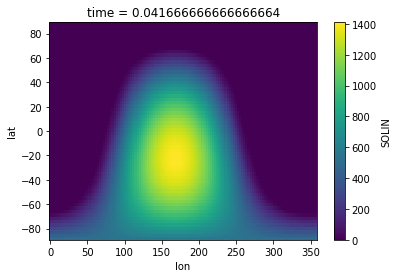

In [16]:
ds['SOLIN'].isel(time=1).plot();

How about a latitude-height slice of the temperature. Since the height coordinate is pressure, we can use the option `yincrease=False` to reverse the y-axis.

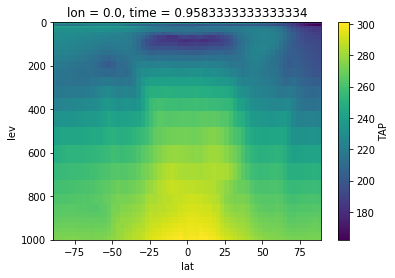

In [17]:
ds['TAP'].isel(time=-1, lon=0).plot(yincrease=False);

The plotting is build on top of matplotlib's [pcolormesh](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.pcolormesh.html#matplotlib.pyplot.pcolormesh) function. This means we can pass all valid arguments to this function.

Additionally, we can use the standard `plt` functions afterwards to customize the plot.

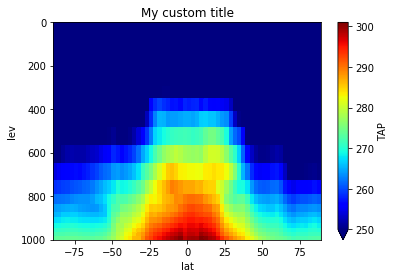

In [18]:
ds['TAP'].isel(time=-1, lon=0).plot(yincrease=False, cmap='jet', vmin=250)
plt.title('My custom title');

1D data will get displayed as a line plot. Again, we can pass the regular `plt.plot` arguments.

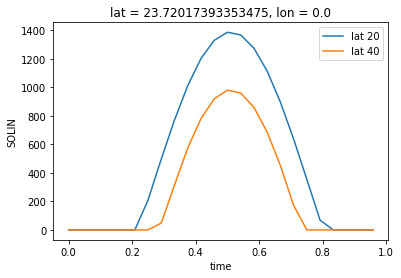

In [19]:
ds['SOLIN'].isel(lon=0, lat=20).plot(label='lat 20')
ds['SOLIN'].isel(lon=0, lat=40).plot(label='lat 40')
plt.legend();

## Computations

Now that we know how to index, let's do some computations. 

Why not take the mean of SOLIN over time.

In [20]:
ds['SOLIN'].mean(dim='time')

<xarray.DataArray 'SOLIN' (lat: 64, lon: 128)>
array([[ 510.306396,  510.310059,  510.308929, ...,  510.265991,  510.284302,
         510.297852],
       [ 511.418915,  511.42746 ,  511.424683, ...,  511.326324,  511.368256,
         511.39917 ],
       [ 511.334595,  511.347931,  511.343628, ...,  511.189819,  511.255463,
         511.303711],
       ..., 
       [   0.      ,    0.      ,    0.      , ...,    0.      ,    0.      ,
           0.      ],
       [   0.      ,    0.      ,    0.      , ...,    0.      ,    0.      ,
           0.      ],
       [   0.      ,    0.      ,    0.      , ...,    0.      ,    0.      ,
           0.      ]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 -76.74 -73.95 -71.16 ...
  * lon      (lon) float64 0.0 2.812 5.625 8.438 11.25 14.06 16.88 19.69 ...

Or the standard deviation of temperature over time and longitude.

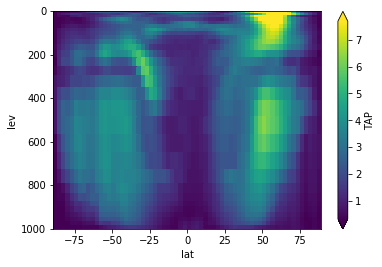

In [21]:
ds['TAP'].std(dim=('time', 'lon')).plot(yincrease=False, robust=True);

Just as with numpy arrays we can do operations with multiple DataArrays. For no reason whatsoever we can multiply temperature and solar radiation. It will automatically match and broadcast dimensions. As an aside, if you are unsure what broadcasting is (which is super useful in numpy) check this out: https://docs.scipy.org/doc/numpy-1.14.0/user/basics.broadcasting.html

In [22]:
ds['TAP'] * ds['SOLIN']

<xarray.DataArray (time: 24, lev: 30, lat: 64, lon: 128)>
array([[[[      0.      , ...,       0.      ],
         ..., 
         [      0.      , ...,       0.      ]],

        ..., 
        [[      0.      , ...,       0.      ],
         ..., 
         [      0.      , ...,       0.      ]]],


       ..., 
       [[[ 119065.492188, ...,  119265.726562],
         ..., 
         [      0.      , ...,       0.      ]],

        ..., 
        [[ 132017.609375, ...,  132238.515625],
         ..., 
         [      0.      , ...,       0.      ]]]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 -76.74 -73.95 -71.16 ...
  * lon      (lon) float64 0.0 2.812 5.625 8.438 11.25 14.06 16.88 19.69 ...
  * lev      (lev) float64 3.643 7.595 14.36 24.61 38.27 54.6 72.01 87.82 ...
  * time     (time) float64 0.0 0.04167 0.08333 0.125 0.1667 0.2083 0.25 ...

## Opening a multi-file Dataset

xarray also allows us to handle multiple files and large data amounts. For this is uses dask arrays in the background.

In [23]:
!ls CAM*.nc

CAM01.nc CAM02.nc CAM03.nc


In [24]:
mfds = xr.open_mfdataset('CAM*.nc', decode_times=False)

If you are reading in a very large dataset and it takes a very long time, you can use the option `decode_cf=False` to speed up things. As far as I know, this shouldn't break things...

In [25]:
mfds

<xarray.Dataset>
Dimensions:  (lat: 64, lev: 30, lon: 128, time: 72)
Coordinates:
  * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 -76.74 -73.95 -71.16 ...
  * lon      (lon) float64 0.0 2.812 5.625 8.438 11.25 14.06 16.88 19.69 ...
  * lev      (lev) float64 3.643 7.595 14.36 24.61 38.27 54.6 72.01 87.82 ...
  * time     (time) float64 0.0 0.04167 0.08333 0.125 0.1667 0.2083 0.25 ...
Data variables:
    TAP      (time, lev, lat, lon) float32 dask.array<shape=(72, 30, 64, 128), chunksize=(24, 30, 64, 128)>
    SOLIN    (time, lat, lon) float32 dask.array<shape=(72, 64, 128), chunksize=(24, 64, 128)>

So now we have a dataset with 72 time steps instead of 24. The other large difference is that the values are not actually loaded into memory. Instead they are represented as dask arrays in chunks.

This means that the values will be loaded only if we access them directly or need them to do some computation. This is called lazy computing. Any operation done will be executed in chunks, one at a time across multiple processors. This is great for not blowing up your RAM. For more information check out: http://xarray.pydata.org/en/stable/dask.html

Let quickly try it out.

In [26]:
tmp = mfds['TAP'].mean(('time', 'lon')); tmp

<xarray.DataArray 'TAP' (lev: 30, lat: 64)>
dask.array<shape=(30, 64), dtype=float32, chunksize=(30, 64)>
Coordinates:
  * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 -76.74 -73.95 -71.16 ...
  * lev      (lev) float64 3.643 7.595 14.36 24.61 38.27 54.6 72.01 87.82 ...

If we actually want to get the values, we can either convert the array to a numpy array or use the `load` command.

In [27]:
tmp.load()

<xarray.DataArray 'TAP' (lev: 30, lat: 64)>
array([[ 246.670868,  246.636551,  246.598572, ...,  169.052704,  168.419128,
         168.171921],
       [ 232.167862,  232.414734,  232.575546, ...,  173.738846,  173.020187,
         172.523575],
       [ 217.026825,  216.911026,  217.021545, ...,  163.281387,  162.190521,
         161.852112],
       ..., 
       [ 270.860382,  270.917542,  270.963531, ...,  269.676392,  269.705048,
         269.735504],
       [ 272.248779,  272.238647,  272.277039, ...,  271.040863,  271.075531,
         271.097107],
       [ 273.61026 ,  273.599823,  273.629913, ...,  272.617889,  272.657104,
         272.670959]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 -76.74 -73.95 -71.16 ...
  * lev      (lev) float64 3.643 7.595 14.36 24.61 38.27 54.6 72.01 87.82 ...

## Creating DataArrays and Datasets

What if we have some data in a numpy array and want to create a xarray DataArray from it.

In [28]:
myda = xr.DataArray(np.random.rand(4, 5)); myda

<xarray.DataArray (dim_0: 4, dim_1: 5)>
array([[ 0.493679,  0.20675 ,  0.218715,  0.697395,  0.532517],
       [ 0.327763,  0.36165 ,  0.971751,  0.477955,  0.706548],
       [ 0.072182,  0.786471,  0.991114,  0.727688,  0.827369],
       [ 0.167094,  0.064798,  0.813554,  0.751801,  0.621322]])
Dimensions without coordinates: dim_0, dim_1

But now we have no coordinates... let's create some

In [29]:
lats = np.arange(4); lons = np.arange(5)
lats, lons

(array([0, 1, 2, 3]), array([0, 1, 2, 3, 4]))

In [30]:
myda = xr.DataArray(np.random.rand(4, 5), coords = {'lat': lats, 'lon': lons}, dims=('lat', 'lon'))
myda

<xarray.DataArray (lat: 4, lon: 5)>
array([[ 0.580963,  0.105729,  0.209738,  0.064769,  0.505583],
       [ 0.082204,  0.152136,  0.972305,  0.377404,  0.117867],
       [ 0.564128,  0.504259,  0.93567 ,  0.76616 ,  0.695429],
       [ 0.134016,  0.396696,  0.994327,  0.392411,  0.711931]])
Coordinates:
  * lat      (lat) int64 0 1 2 3
  * lon      (lon) int64 0 1 2 3 4

We can also add attributes such as units.

In [31]:
myda.attrs['units'] = 'K'

And a name for our variable

In [32]:
myda.name = 'Var1'

Let's now create another DataArray with one coordinate from above and a new one.

In [33]:
levs = np.arange(3); levs

array([0, 1, 2])

In [34]:
myda2 = xr.DataArray(np.random.rand(3, 5), coords = {'lev': levs, 'lon': lons}, dims=('lev', 'lon'))
myda2.name = 'Var2'
myda2

<xarray.DataArray 'Var2' (lev: 3, lon: 5)>
array([[ 0.737322,  0.667538,  0.119973,  0.442553,  0.902985],
       [ 0.065068,  0.433848,  0.479421,  0.625673,  0.08194 ],
       [ 0.115688,  0.851471,  0.123189,  0.580963,  0.559465]])
Coordinates:
  * lev      (lev) int64 0 1 2
  * lon      (lon) int64 0 1 2 3 4

 Now we merge the two DataArrays to a Dataset.

In [35]:
myds = xr.merge([myda, myda2]); myds

<xarray.Dataset>
Dimensions:  (lat: 4, lev: 3, lon: 5)
Coordinates:
  * lat      (lat) int64 0 1 2 3
  * lon      (lon) int64 0 1 2 3 4
  * lev      (lev) int64 0 1 2
Data variables:
    Var1     (lat, lon) float64 0.581 0.1057 0.2097 0.06477 0.5056 0.0822 ...
    Var2     (lev, lon) float64 0.7373 0.6675 0.12 0.4426 0.903 0.06507 ...

## Plotting with cartopy 

Yes, you can combine the plotting functionality with cartopy. More about plotting can be found here: http://xarray.pydata.org/en/stable/plotting.html

I am no expert, but let's still try to figure out how to do one plot...

In [36]:
import cartopy.crs as ccrs

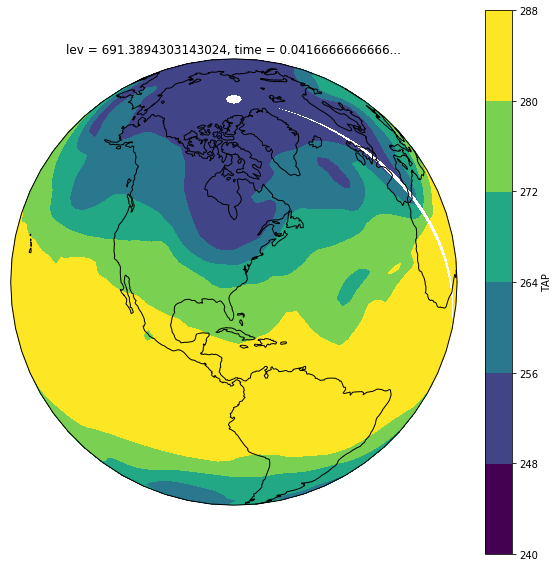

In [37]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.Orthographic(-80, 35))
TAP.isel(time=1, lev=20).plot.contourf(ax=ax, transform=ccrs.PlateCarree())
ax.set_global(); ax.coastlines();

# End